In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import argparse

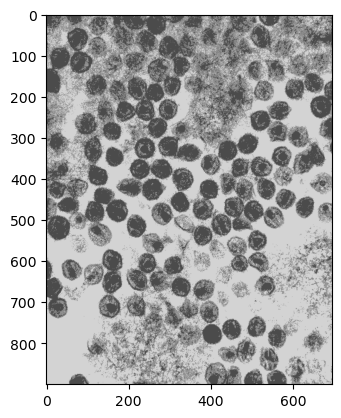

In [2]:
img = cv.imread('photos/Medical Images/med image 45.jpg')
z = img.reshape((-1,3))
z = np.float32(z)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3
ret, label,center=cv.kmeans(z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()

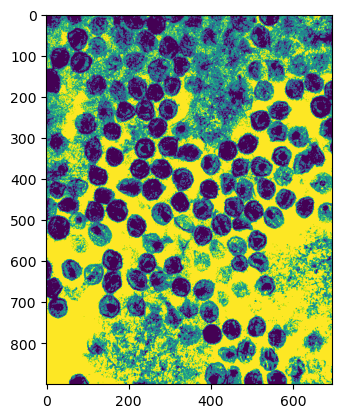

In [3]:
im_gray = cv.cvtColor(res2, cv.COLOR_BGR2GRAY)
plt.imshow(im_gray)

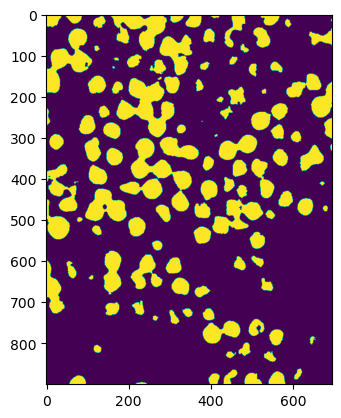

In [47]:
img = cv.medianBlur(im_gray, 15)
ret, th1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY_INV)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                          cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                          cv.THRESH_BINARY, 11, 2)
cv.imwrite('photos/Medical Images/HIV particles1.jpg', th1)
plt.imshow(th1)

Nunmber of HIV Particles:  130


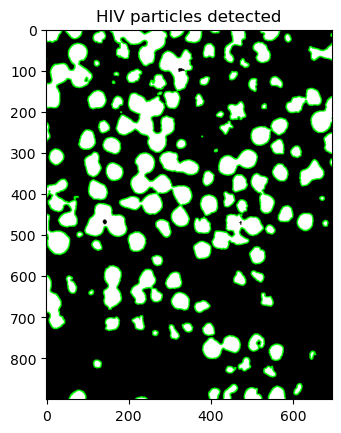

True

In [48]:
image_mormal = cv.imread('photos/Medical Images/HIV particles1.jpg')
gray = cv.cvtColor(image_mormal, cv.COLOR_BGR2GRAY)
binary = cv.Canny(gray, 200, 100)
cnts, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour_img = cv.drawContours(image_mormal, cnts, -1, (0, 255, 0), 2)

print('Nunmber of HIV Particles: ', len(cnts))
plt.imshow(contour_img)
plt.title('HIV particles detected')d
plt.show()

cv.imshow('WBC', contour_img)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('photos/Medical Images/HIV particles detected1.jpg', contour_img)